# e-Commerce Cart Data Analysis

- Obj
    - 수천만 건의 커머스 데이터를 이용하여 재구매 예측 모형 개발
<br><br>
- ML-Model 
    - XGboost
<br><br>
- Process
    - Data Load -> EDA -> Data Wrangling -> Data Modeling (ML)
<br><br>
- Data Description
<br><br>
    - aisles : 상품 카테고리 (소분류, 1~6)
        - aisle_id : 소분류 번호
        - aisle : 소분류명
<br><br>        
    - departments : 상품 카테고리 (대분류, 1~6)
        - department_id : 대분류 번호
        - department : 대분류명
<br><br>        
    - orderp : __?__
        - order_id : 주문번호
        - product_id : 상품번호
        - add_to_cart_order : 카트에 담은 순서
        - reordered : 재주문 여부 (False : 0, True: 1)
<br><br>
    - ordert : __훈련 데이터?__
        - order_id : 주문번호
        - product_id : 상품번호
        - add_to_cart_order : 카트에 담은 순서
        - reordered : 재주문 여부 (False : 0, True: 1)
<br><br>
    - orders : 주문정보가 담겨 있는 테이블 ?
        - user_id 기준으로 days_since_prior_order 를 갱신하는 것인지?
        - order_id : 주문번호
        - user_id : 유저번호
        - eval_set : __?__ (prior / train / test)
        - order_number : __주문순서 ?__ (1~100)
        - order_dow : __?__
        - order_hour_of_day : __?__
        - days_since_prior_order : 재주문한 날짜
<br><br>
    - products : 제품 정보가 담겨 있는 테이블
        - product_id : 상품번호
        - product_name : 상품명
        - aisle_id : 소분류 번호
        - department_id : 대분류 번호
<br><br>    
- library
    - data.table
        - 
        - fread
    - dplyr
        - 데이터 전처리 라이브러리
    - tidyr
        - 
    - CKmeans.1d.dp
        - 
    - DBI
        - 
    - RMYSQL
        - Database와 연동하는 라이브러리
    - XGboost
        - Machine Learning Library
        - 
    - Decision Tree
        - Machine Learning Library
        - 의사결정나무
        
- https://docs.google.com/spreadsheets/d/1Di_diD4tTtSwFH-7bvopdLzsc602HrLrLnCty_xOQ1A/edit#gid=0
- [instacart](http://bongholee.com/2017/07/%EC%9D%B8%EC%8A%A4%ED%83%80%EC%B9%B4%ED%8A%B8instacart-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D%ED%95%B4%EB%B3%B4%EA%B8%B01/)
- [insta-cart](https://www.kaggle.com/philippsp/exploratory-analysis-instacart/notebook)
- [통계가 탐정이라면 데이터는 단서다](http://bongholee.com/2017/08/%EC%B1%85-%ED%86%B5%EA%B3%84%EA%B0%80-%ED%83%90%EC%A0%95%EC%9D%B4%EB%9D%BC%EB%A9%B4-%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%8A%94-%EB%8B%A8%EC%84%9C%EC%9D%B4%EB%8B%A4-%EB%B2%8C%EA%B1%B0%EB%B2%97%EC%9D%80/)
- [불확실한 시대에 확률적 사고가 필요한 이유](http://bongholee.com/2017/09/%EB%B6%88%ED%99%95%EC%8B%A4%ED%95%9C-%EC%8B%9C%EB%8C%80%EC%97%90-%ED%99%95%EB%A5%A0%EC%A0%81-%EC%82%AC%EA%B3%A0%EA%B0%80-%ED%95%84%EC%9A%94%ED%95%9C-%EC%9D%B4%EC%9C%A0-%ED%96%89%EC%9A%B4%EC%97%90/)
- [예측은 애시당초 정답을 찾으려는 게 아니다](http://bongholee.com/2017/06/%EC%98%88%EC%B8%A1%EC%9D%80-%EC%95%A0%EC%8B%9C%EB%8B%B9%EC%B4%88-%EC%A0%95%EB%8B%B5%EC%9D%84-%EC%B0%BE%EC%9C%BC%EB%A0%A4%EB%8A%94%EA%B2%8C-%EC%95%84%EB%8B%88%EB%8B%A4%EC%8B%A0%ED%98%B8%EC%99%80/)
- [Data Science For Good: DonorsChoose.org](https://www.kaggle.com/donorschoose/io)

### 큰 그림을 그릴 수 있는 설명이 필요한 듯 싶어요
- 이전 시간에 엑셀 파일로 시각화해서 보여주셨듯이요!
- 어떤 목적을 갖고, 어떤 어떤 데이터가(테이블이) 있고, 거기에서 어떤 테이블의 어떤 요소들을 조합해서 어떤 feature들을 만들 것이고, 어떤 새로운 테이블을 만들어서, 전처리한 다음에, 어떤 식으로 모델링을 해서, 어떤 결과를 도출할 것이다! 이런 요약이 필요한 것 같아요 수영님!

## 1. Import Libraries

In [3]:
## Import Library ---------------------------------------------------------------
library('data.table')
library('dplyr')
library('tidyr')
library('Ckmeans.1d.dp')
library('DBI')
library('RMySQL')

## 2. Connect R to Mysql

In [6]:
## Connect R to Mysql ---------------------------------------------------------------
mydb = dbConnect(MySQL(),	 user='id',	 password='pwd',	
                 dbname='mkt', host='127.0.0.1')

In [4]:
## Connect R to Mysql ---------------------------------------------------------------
mydb = dbConnect(MySQL(),	 user='root',	 password='qawsedrf098!',	
                 dbname='mkt', host='127.0.0.1')

ERROR: Error in .local(drv, ...): Failed to connect to database: Error: Access denied for user 'root'@'localhost' (using password: YES)



## 3. Load Data

In [5]:
## Load Data ---------------------------------------------------------------
aisles = fread("/Users/mac/Downloads/dev/study/SQL&R/rawdata/aisles.csv")
departments = fread("/Users/mac/Downloads/dev/study/SQL&R/rawdata/departments.csv")
orderp = fread("/Users/mac/Downloads/dev/study/SQL&R/rawdata/order_products__prior.csv")
ordert = fread("/Users/mac/Downloads/dev/study/SQL&R/rawdata/order_products__train.csv")
orders = fread("/Users/mac/Downloads/dev/study/SQL&R/rawdata/orders.csv")
products = fread("/Users/mac/Downloads/dev/study/SQL&R/rawdata/products.csv")

In [6]:
# products -----------
head(aisles)       # 소분류(상품 종류)
head(departments)  # 대분류(상품 종류)
head(orderp)       # 주문번호, 상품번호, 카트에 넣은 순서, 재구매 여부(0: False, 1: True)
head(ordert)       # 학습데이터
head(orders)       # order_id는 unique 값
head(products)     # aisle_id, department_id 와 join

aisle_id,aisle
1,prepared soups salads
2,specialty cheeses
3,energy granola bars
4,instant foods
5,marinades meat preparation
6,other


department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international


order_id,product_id,add_to_cart_order,reordered
2,33120,1,1
2,28985,2,1
2,9327,3,0
2,45918,4,1
2,30035,5,0
2,17794,6,1


order_id,product_id,add_to_cart_order,reordered
1,49302,1,1
1,11109,2,1
1,10246,3,0
1,49683,4,0
1,43633,5,1
1,13176,6,0


order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2539329,1,prior,1,2,8,NA
2398795,1,prior,2,3,7,15
473747,1,prior,3,3,12,21
2254736,1,prior,4,4,7,29
431534,1,prior,5,4,15,28
3367565,1,prior,6,2,7,19


product_id,product_name,aisle_id,department_id
1,Chocolate Sandwich Cookies,61,19
2,All-Seasons Salt,104,13
3,Robust Golden Unsweetened Oolong Tea,94,7
4,Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce,38,1
5,Green Chile Anytime Sauce,5,13
6,Dry Nose Oil,11,11


## 4. Reshape Data
- 1) inner_join, match, mutate, group_by, summarise, arrange
- 2) as.factor
- inner_join : dataframe 간 join
- match : 벡터간 위치 비교

### Q. 2주차에 했던 방식과 다른데 그 이유는?
- as.factor는 한 컬럼을 factor로 만들어준다는 명령어일텐데, factor가 무엇인지? 이렇게 하는 이유는?
> - factor는 모델링 돌릴 때, 회귀분석을 돌린다면... 모델의 종속/독립 변수라는 걸 설정해주면 R이 조금 더 정확하게 이해를 한다.
> - 굳이 하지 않아도 돌아가기는 하는데, 변경을 해서 돌린다.
> - 변수 설정

In [7]:
## Reshape data ------------------------------------------------------------
## ---------------------------------------------------------------
aisles$aisle <- as.factor(aisles$aisle)
departments$department <- as.factor(departments$department)
orders$eval_set <- as.factor(orders$eval_set)
products$product_name <- as.factor(products$product_name)

### Q.
- 이전에 작성했던 쿼리는 aisle_id, department_id를 기준으로 inner_join 하는 건데, 지금 쿼리는 제외(-aisle_id, -department_id)하고 지우기?
- rm을 하는 이유는?
- 예전 쿼리처럼 주석이 달려있으면 더 좋을 것 같아요!

- 주석처리된 과거 코드
```SQL
select  *
from products a
inner join  aisles b
        on  a.aisle_id = b.aisle_id
inner join departments c
        on a.department_id = c.department_id
```

- __현재 코드는?__

In [8]:
# products에 aisle, department 정보 붙이기 (inner_join)
# products <- products %>%
#     inner_join(aisles, by='aisle_id') %>%
#     inner_join(departments, by='department_id')

## products 테이블에 aisle, department 정보 붙이고, 기존 테이블(aisles, departments) 제거---------------------------------------------------------------
products <- products %>%
    inner_join(aisles) %>%
    inner_join(departments) %>%
    select(-aisle_id, -department_id)
rm(aisles, departments)

## match == inner_join ---------------------------------------------------------------
# ordert와 orders의 교집합 중에 orders의 위치를 찾아 ordert에 넣는다
ordert$user_id <- orders$user_id[match(ordert$order_id, orders$order_id)]

## 새로운 테이블(orders_products) 생성 후 기존 테이블(orderp) 제거 ---------------------------------------------------------------
# orders 테이블에 orderp inner_join(on order_id)
orders_products <- orders %>% inner_join(orderp, by = "order_id")
rm(orderp)

## 메모리 초기화(정리) ---------------------------------------------------------------
gc()

Joining, by = "aisle_id"
Joining, by = "department_id"


,used,(Mb),gc trigger,(Mb),limit (Mb),max used,(Mb)
Ncells,791690,42.3,1505515,80.5,NA,1139421,60.9
Vcells,207376199,1582.2,329637784,2515.0,16384,272976821,2082.7


## 5. prd (products)
- __train data ?__
> - __orders_x ? == prd ?__


```r
## 1. product_time column 생성
# reodered는 0과 1로 이루어져 있음 (0: False, 1: True)
# product_time은 재구매 횟수
orders_products %>%
  arrange(user_id, order_number, product_id) %>%
  group_by(user_id, product_id) %>%
  mutate(product_time = row_number())

## 2. ungroup
# ungroup을 해주는 이유는 group_by를 하기 위함일텐데
# group한 것에 다시 group을 할 수 없어서 이런 것을 하는 것인가?
# sql의 having 같은 기능구 현을 위한 것인가?
# group_by에 다시 조건을 주기 위해
orders_products %>%
  arrange(user_id, order_number, product_id) %>%
  group_by(user_id, product_id) %>%
  mutate(product_time = row_number()) %>%
  ungroup() %>%

## 3. group & summarise
# product_id로 다시 묶은 이유는?
orders_products %>%
  arrange(user_id, order_number, product_id) %>%
  group_by(user_id, product_id) %>%
  mutate(product_time = row_number()) %>%
  ungroup() %>%
  group_by(product_id) %>%
  summarise(
    prod_orders = n(),
    prod_reorders = sum(reordered),
    prod_first_orders = sum(product_time == 1),
    prod_second_orders = sum(product_time == 2)
  )

```

- orders_x 테이블 생성
> - keyword: group_by, mutate, rnk, ungroup
> - 1) user_id와 product_id를 group_by 한 다음에, mutate 함수로 rnk를 생성
>> - rnk의 약자, row_number는 넘버링을 위한 것인데, cnt를 하기 위한 것?
>> - 유저별, 상품별 구매한 순서를 매기기 위한 것
>> - 한 유저가 상품을 몇 번 구매했는지 알기 위해 넘버링

In [9]:
names(orders_products)
str(orders_products)

[1] "order_id"               "user_id"                "eval_set"              
 [4] "order_number"           "order_dow"              "order_hour_of_day"     
 [7] "days_since_prior_order" "product_id"             "add_to_cart_order"     
[10] "reordered"

'data.frame':	32434489 obs. of  10 variables:
 $ order_id              : int  2539329 2539329 2539329 2539329 2539329 2398795 2398795 2398795 2398795 2398795 ...
 $ user_id               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ eval_set              : Factor w/ 3 levels "prior","test",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ order_number          : int  1 1 1 1 1 2 2 2 2 2 ...
 $ order_dow             : int  2 2 2 2 2 3 3 3 3 3 ...
 $ order_hour_of_day     : int  8 8 8 8 8 7 7 7 7 7 ...
 $ days_since_prior_order: num  NA NA NA NA NA 15 15 15 15 15 ...
 $ product_id            : int  196 14084 12427 26088 26405 196 10258 12427 13176 26088 ...
 $ add_to_cart_order     : int  1 2 3 4 5 1 2 3 4 5 ...
 $ reordered             : int  0 0 0 0 0 1 0 1 0 1 ...


In [10]:
orders_products %>% head(10)

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
2539329,1,prior,1,2,8,NA,196,1,0
2539329,1,prior,1,2,8,NA,14084,2,0
2539329,1,prior,1,2,8,NA,12427,3,0
2539329,1,prior,1,2,8,NA,26088,4,0
2539329,1,prior,1,2,8,NA,26405,5,0
2398795,1,prior,2,3,7,15,196,1,1
2398795,1,prior,2,3,7,15,10258,2,0
2398795,1,prior,2,3,7,15,12427,3,1
2398795,1,prior,2,3,7,15,13176,4,0
2398795,1,prior,2,3,7,15,26088,5,1


In [11]:
orders_products %>%
  arrange(user_id, order_number, product_id) %>%
  group_by(user_id, product_id) %>%
  mutate(product_time = row_number()) %>% head(10)

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_time
2539329,1,prior,1,2,8,NA,196,1,0,1
2539329,1,prior,1,2,8,NA,12427,3,0,1
2539329,1,prior,1,2,8,NA,14084,2,0,1
2539329,1,prior,1,2,8,NA,26088,4,0,1
2539329,1,prior,1,2,8,NA,26405,5,0,1
2398795,1,prior,2,3,7,15,196,1,1,2
2398795,1,prior,2,3,7,15,10258,2,0,1
2398795,1,prior,2,3,7,15,12427,3,1,2
2398795,1,prior,2,3,7,15,13032,6,0,1
2398795,1,prior,2,3,7,15,13176,4,0,1


### 5-1.

In [12]:
## Products ----------------------------------------------------------------
## 새로운 테이블(prd) 생성 후, 기존 테이블(products) 제거
## 쿼리 처리 순서 : ?
## 1) orders_products 테이블에서 user_id, product_id를 grouping해서 user_id, order_number, product_id를 오름차순으로 araange 한 다음
## 2) ungroup 하여, product_time 변수(컬럼)을 새로 생성해서
## 3) 다시 ungroup하고, 다시 product_id를 기준으로 grouping해서
## 4) 새로운 집계 함수를 만든다
## product_time == row_number?
## group_by(user_id, product_id)를 기준으로 묶었기에 count가 됨?

prd <- orders_products %>%
  arrange(user_id, order_number, product_id) %>%
  group_by(user_id, product_id) %>%
  mutate(product_time = row_number()) %>%
  ungroup() %>%
  group_by(product_id) %>%

  summarise(
    prod_orders = n(),
    prod_reorders = sum(reordered),
    prod_first_orders = sum(product_time == 1),
    prod_second_orders = sum(product_time == 2)
  )

prd %>% head(10)

product_id,prod_orders,prod_reorders,prod_first_orders,prod_second_orders
1,1852,1136,716,276
2,90,12,78,8
3,277,203,74,36
4,329,147,182,64
5,15,9,6,4
6,8,3,5,2
7,30,12,18,6
8,165,83,82,30
9,156,82,74,31
10,2572,1304,1268,399


### 5-2.

In [13]:
## 재구매율
prd$prod_reorder_probability <- prd$prod_second_orders / prd$prod_first_orders
## 재구매건수
prd$prod_reorder_times <- 1 + prd$prod_reorders / prd$prod_first_orders
## 상품 전체 주문 건수 중에서 재구매 건수의 비중을 본 것
prd$prod_reorder_ratio <- prd$prod_reorders / prd$prod_orders
## 특정 컬럼 제외하기
prd <- prd %>% select(-prod_reorders, -prod_first_orders, -prod_second_orders)

## products 테이블 제거
rm(products)
## 메모리 초기화
gc()

,used,(Mb),gc trigger,(Mb),limit (Mb),max used,(Mb)
Ncells,754798,40.4,24313531,1298.5,NA,30391914,1623.2
Vcells,207170269,1580.6,589292569,4496.0,16384,726677397,5544.2


In [14]:
prd %>%
    arrange(desc(prd$prod_reorder_times)) %>%
    head()

product_id,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio
6433,68,0.5000000,17.00000,0.9411765
2075,87,0.8333333,14.50000,0.9310345
43553,13,1.0000000,13.00000,0.9230769
27740,101,0.7500000,12.62500,0.9207921
14609,35,0.3333333,11.66667,0.9142857
13875,45,0.5000000,11.25000,0.9111111


In [15]:
ordert %>% head

order_id,product_id,add_to_cart_order,reordered,user_id
1,49302,1,1,112108
1,11109,2,1,112108
1,10246,3,0,112108
1,49683,4,0,112108
1,43633,5,1,112108
1,13176,6,0,112108


[최종 결과물]
- 최종: user_id, order_id, product_id, 상품 특성, user 특성, 재구매여부
> - 1차 : user_id, order_id, product_id, 상품 특성 ... prd
> - 2차 : user 특성 테이블
> - 3차 : inner_join으로 1+2차 합치기
> - 4차 : 모델링(알고리즘 생성)
> - 5차 : 평가

## 6. Users & Us
- Obj : Create __??__ table

### 6-1. users table
- obj : __??__
<br><br>
- use table & group
    - table : orders_products
    - group_by : user_id
<br><br>
- feature : __??_
    - order_id : 사용 X ?
    - eval_set : filtering 조건에서 사용(train)
    - order_number : 사용 X ?
    <br><br>
    - user_id : 유저번호(pk)
    - user_orders : user_id별 총 구매수
    - user_period : 총 구매기간 간격 합
    - user_mean_days_since_prior : 구매기간 간격 평균
<br><br>

- Process
    - 1) orders 테이블에서 user_id로 grouping하여,
    - 2) 집계함수 (user_orders(user_id별 총 구매수) / user_period(총 구매기간 간격 합) / user_mean_days_since_prior(구매기간 간격 평균))
    - 3) 최종적으로 prior로 필터링
<br><br>
- etc decription
    - orders 테이블 중 order_number는 user_id의 몇번째 구매 건수인지를 알려줌
<br><br>
    - 필터 조건의 대상(eval_set == "prior")으로 함수를 적용하겠다는 뜻 ... eval_set이란?
<br><br>
    - prior를 이용해서 만든 테이블을 test와 train에 붙일 것 ... 최종으로 남을 건 test, train

In [16]:
## users table ----------------------------------------------------------------
# feature : order_id, user_id, eval_set, order_number, user_orders (user_id별 총 구매수), user_period (총 구매기간 간격 합), user_mean_days_since_prior(구매기간 간격 평균)
# obj : ?
# order_number는 user_id의 몇번째 구매 건수를 알려줌
# 필터 조건의 대상(eval_set == "prior")으로 함수를 적용하겠다는 뜻! // eval_set이란?
# prior를 이용해서 만든 테이블을 test와 train에 붙일 것 ... 최종으로 남을 건 test, train

unique(orders$eval_set)
head(orders)

[1] prior train test 
Levels: prior test train

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2539329,1,prior,1,2,8,NA
2398795,1,prior,2,3,7,15
473747,1,prior,3,3,12,21
2254736,1,prior,4,4,7,29
431534,1,prior,5,4,15,28
3367565,1,prior,6,2,7,19


### Q.
- 결측치 제외하고 계산하는 것이 가장 간단한 방법이지만 다른 방법이 있는지?
    - null 값은 첫구매일테니 제외?
    - na.rm=T 대신에 F나 생략하는 경우에는?
    - 연산할 때, na.rm=T를 지정하지 않아도 알아서 되지 않으려나?
    - 업무에서 결측치를 만난다면 어떻게 처리하는지?
    
    
    - median이나 제외를 하고 본다.
    - 결측치가 많으면 아예 그 값을 안 본다.
    - 결측치가 적으면 결측치를 제외하고 보던지 같이 뽑아버리던지

In [17]:
#### users table 생성
## 1) orders 테이블에서 user_id로 grouping하여,
## 2) 집계함수 (user_orders(user_id별 총 구매수) / user_period(총 구매기간 간격 합) / user_mean_days_since_prior(구매기간 간격 평균))
## 3) 최종적으로 prior로 필터링

users = orders %>% filter(eval_set == "prior") %>% group_by(user_id) %>%
    summarise(user_orders = max(order_number),
              user_period = sum(days_since_prior_order, na.rm=T), ## na.rm=T == 결측치 처리 (결측치 제외하고 계산 ?)
              user_mean_days_since_prior = mean(days_since_prior_order, na.rm=T))

users %>% head()

user_id,user_orders,user_period,user_mean_days_since_prior
1,10,176,19.55556
2,14,198,15.23077
3,12,133,12.09091
4,5,55,13.75000
5,4,40,13.33333
6,3,18,9.00000


### 6-2. Us table
- obj
    - 유저별 총 구매건수, 그 사람이 재구매를 얼마나 했는지, 그리고 얼마나 다양한 상품을 샀는지 파악
<br><br>
- use table & group
    - table : orders_products
    - group_by : user_id
<br><br>
- feature
    - user_id별 user_total_products (총 구매상품수)
    - user_reorder_ratio (재구매율)
    - user_distinct_products (구매 상품 수 unique)
<br><br>
- etc description
    - ?

In [18]:
orders_products %>% head()

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
2539329,1,prior,1,2,8,NA,196,1,0
2539329,1,prior,1,2,8,NA,14084,2,0
2539329,1,prior,1,2,8,NA,12427,3,0
2539329,1,prior,1,2,8,NA,26088,4,0
2539329,1,prior,1,2,8,NA,26405,5,0
2398795,1,prior,2,3,7,15,196,1,1


In [19]:
## us table ----------------------------------------------------------------
# feature : user_id별 user_total_products (총 구매상품수), user_reorder_ratio (재구매율), user_distinct_products (구매 상품 수 unique)
# obj : 유저별 총 구매건수, 그 사람이 재구매를 얼마나 했는지, 그리고 얼마나 다양한 상품을 샀는지 파악

us = orders_products %>%
    group_by(user_id) %>%
    summarise(user_total_product = n() # user_id별 총 구매 상품수
              , user_reorder_ratio = sum(reordered == 1) / sum(order_number > 1) # 재구매율 ## order_number가 1보다 크면(조건을 만족하면), 1이 나옴. 그 다음행으로 가서 그 조건을 만족하면 1 아니면 0 그래서 각각 더해줌... 결론적으로 count와 같음!
              , user_distinct_products = n_distinct(product_id)
             )

str(us)
str(users)
us %>% head()
users %>% head()

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	206209 obs. of  4 variables:
 $ user_id               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ user_total_product    : int  59 195 88 18 37 14 206 49 76 143 ...
 $ user_reorder_ratio    : num  0.7593 0.511 0.7051 0.0714 0.5385 ...
 $ user_distinct_products: int  18 102 33 17 23 12 68 36 58 94 ...
Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	206209 obs. of  4 variables:
 $ user_id                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ user_orders               : num  10 14 12 5 4 3 20 3 3 5 ...
 $ user_period               : num  176 198 133 55 40 18 203 60 36 79 ...
 $ user_mean_days_since_prior: num  19.6 15.2 12.1 13.8 13.3 ...
 - attr(*, ".internal.selfref")=<externalptr> 


user_id,user_total_product,user_reorder_ratio,user_distinct_products
1,59,0.75925926,18
2,195,0.51098901,102
3,88,0.70512821,33
4,18,0.07142857,17
5,37,0.53846154,23
6,14,0.20000000,12


user_id,user_orders,user_period,user_mean_days_since_prior
1,10,176,19.55556
2,14,198,15.23077
3,12,133,12.09091
4,5,55,13.75000
5,4,40,13.33333
6,3,18,9.00000


In [20]:
## 전처리한 users와 us 테이블을 inner_join

users = users %>% inner_join(us)

str(users)
users %>% head()

Joining, by = "user_id"


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	206209 obs. of  7 variables:
 $ user_id                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ user_orders               : num  10 14 12 5 4 3 20 3 3 5 ...
 $ user_period               : num  176 198 133 55 40 18 203 60 36 79 ...
 $ user_mean_days_since_prior: num  19.6 15.2 12.1 13.8 13.3 ...
 $ user_total_product        : int  59 195 88 18 37 14 206 49 76 143 ...
 $ user_reorder_ratio        : num  0.7593 0.511 0.7051 0.0714 0.5385 ...
 $ user_distinct_products    : int  18 102 33 17 23 12 68 36 58 94 ...


user_id,user_orders,user_period,user_mean_days_since_prior,user_total_product,user_reorder_ratio,user_distinct_products
1,10,176,19.55556,59,0.75925926,18
2,14,198,15.23077,195,0.51098901,102
3,12,133,12.09091,88,0.70512821,33
4,5,55,13.75000,18,0.07142857,17
5,4,40,13.33333,37,0.53846154,23
6,3,18,9.00000,14,0.20000000,12


In [21]:
## 평균 바스켓 사이즈 (구매상품수...user_orders / 주문건수...user_total_product)
# 새로운 열에 추가, 

users = users %>% mutate(user_average_basket = user_total_product / user_orders)

##### 우리가 최종으로 만들었던 정보들은 users에 있음
str(users)
users %>% head()

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	206209 obs. of  8 variables:
 $ user_id                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ user_orders               : num  10 14 12 5 4 3 20 3 3 5 ...
 $ user_period               : num  176 198 133 55 40 18 203 60 36 79 ...
 $ user_mean_days_since_prior: num  19.6 15.2 12.1 13.8 13.3 ...
 $ user_total_product        : int  59 195 88 18 37 14 206 49 76 143 ...
 $ user_reorder_ratio        : num  0.7593 0.511 0.7051 0.0714 0.5385 ...
 $ user_distinct_products    : int  18 102 33 17 23 12 68 36 58 94 ...
 $ user_average_basket       : num  5.9 13.93 7.33 3.6 9.25 ...


user_id,user_orders,user_period,user_mean_days_since_prior,user_total_product,user_reorder_ratio,user_distinct_products,user_average_basket
1,10,176,19.55556,59,0.75925926,18,5.900000
2,14,198,15.23077,195,0.51098901,102,13.928571
3,12,133,12.09091,88,0.70512821,33,7.333333
4,5,55,13.75000,18,0.07142857,17,3.600000
5,4,40,13.33333,37,0.53846154,23,9.250000
6,3,18,9.00000,14,0.20000000,12,4.666667


### 6-3. Train & Test Data

## Q. 위에 만든 users, us table(기준=prior)과 train & test의 users, us table 이름이 동일하면 위에 껀 다 지워지는 게 아닌지? test_user, test_us, train_user, test_us 이런 식으로 만들어야 하는 건 아닌지?

In [22]:
str(us)
str(orders)

us %>% head(5)
orders %>% head(5)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	206209 obs. of  4 variables:
 $ user_id               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ user_total_product    : int  59 195 88 18 37 14 206 49 76 143 ...
 $ user_reorder_ratio    : num  0.7593 0.511 0.7051 0.0714 0.5385 ...
 $ user_distinct_products: int  18 102 33 17 23 12 68 36 58 94 ...
Classes ‘data.table’ and 'data.frame':	3421083 obs. of  7 variables:
 $ order_id              : int  2539329 2398795 473747 2254736 431534 3367565 550135 3108588 2295261 2550362 ...
 $ user_id               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ eval_set              : Factor w/ 3 levels "prior","test",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ order_number          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ order_dow             : int  2 3 3 4 4 2 1 1 1 4 ...
 $ order_hour_of_day     : int  8 7 12 7 15 7 9 14 16 8 ...
 $ days_since_prior_order: num  NA 15 21 29 28 19 20 14 0 30 ...
 - attr(*, ".internal.selfref")=<externalptr> 


user_id,user_total_product,user_reorder_ratio,user_distinct_products
1,59,0.75925926,18
2,195,0.51098901,102
3,88,0.70512821,33
4,18,0.07142857,17
5,37,0.53846154,23


order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2539329,1,prior,1,2,8,NA
2398795,1,prior,2,3,7,15
473747,1,prior,3,3,12,21
2254736,1,prior,4,4,7,29
431534,1,prior,5,4,15,28


In [23]:
## train & test
# process : eval_set을 기준으로 select
us = orders %>%
    filter(eval_set != "prior") %>%
    select(user_id, order_id, eval_set, time_since_last_order = days_since_prior_order)

str(us)
head(us)

'data.frame':	206209 obs. of  4 variables:
 $ user_id              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ order_id             : int  1187899 1492625 2774568 329954 2196797 1528013 525192 880375 1094988 1822501 ...
 $ eval_set             : Factor w/ 3 levels "prior","test",..: 3 3 2 2 3 2 3 3 3 3 ...
 $ time_since_last_order: num  14 30 11 30 6 22 6 10 30 30 ...
 - attr(*, ".internal.selfref")=<externalptr> 


user_id,order_id,eval_set,time_since_last_order
1,1187899,train,14
2,1492625,train,30
3,2774568,test,11
4,329954,test,30
5,2196797,train,6
6,1528013,test,22


In [24]:
# train과 test데이터만 들어감
users = users %>% inner_join(us)

str(users)
head(users)

Joining, by = "user_id"


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	206209 obs. of  11 variables:
 $ user_id                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ user_orders               : num  10 14 12 5 4 3 20 3 3 5 ...
 $ user_period               : num  176 198 133 55 40 18 203 60 36 79 ...
 $ user_mean_days_since_prior: num  19.6 15.2 12.1 13.8 13.3 ...
 $ user_total_product        : int  59 195 88 18 37 14 206 49 76 143 ...
 $ user_reorder_ratio        : num  0.7593 0.511 0.7051 0.0714 0.5385 ...
 $ user_distinct_products    : int  18 102 33 17 23 12 68 36 58 94 ...
 $ user_average_basket       : num  5.9 13.93 7.33 3.6 9.25 ...
 $ order_id                  : int  1187899 1492625 2774568 329954 2196797 1528013 525192 880375 1094988 1822501 ...
 $ eval_set                  : Factor w/ 3 levels "prior","test",..: 3 3 2 2 3 2 3 3 3 3 ...
 $ time_since_last_order     : num  14 30 11 30 6 22 6 10 30 30 ...


user_id,user_orders,user_period,user_mean_days_since_prior,user_total_product,user_reorder_ratio,user_distinct_products,user_average_basket,order_id,eval_set,time_since_last_order
1,10,176,19.55556,59,0.75925926,18,5.900000,1187899,train,14
2,14,198,15.23077,195,0.51098901,102,13.928571,1492625,train,30
3,12,133,12.09091,88,0.70512821,33,7.333333,2774568,test,11
4,5,55,13.75000,18,0.07142857,17,3.600000,329954,test,30
5,4,40,13.33333,37,0.53846154,23,9.250000,2196797,train,6
6,3,18,9.00000,14,0.20000000,12,4.666667,1528013,test,22


#### 여기까지 user 특성은 완성!

## 7. extra feature ...
- obj
    - create data table
    - __?__
    <br><br>
- process
    -
    <br><br>
- description
    - 상품 특성에 feature를 추가할 것임 ?
        - 상품 구매건수, 해당 아이템 첫 구매 구매 순서, 해당 아이템 마지막 구매 순서, 카트 평균 순위
        <br><br>
    - group_by
        - 구매자별
        - 상품별 정보
        <br><br>
    - up_orders
        - 사람의 상품별 구매건수, ?
        - 해당 아이템의 첫 구매 순서
        - 사람이 상품을 총 구매한 순서 중에서 특정 아이템
        - 최근에 구매한 것이 재구매할 확률이 높다고 판단하기에 넣은 것?
        <br><br>
    - up_average_cart_position
        - user_id가 product_id를 몇 번째에 담았느냐!

In [25]:
orders_products %>% head(100)

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
2539329,1,prior,1,2,8,NA,196,1,0
2539329,1,prior,1,2,8,NA,14084,2,0
2539329,1,prior,1,2,8,NA,12427,3,0
2539329,1,prior,1,2,8,NA,26088,4,0
2539329,1,prior,1,2,8,NA,26405,5,0
2398795,1,prior,2,3,7,15,196,1,1
2398795,1,prior,2,3,7,15,10258,2,0
2398795,1,prior,2,3,7,15,12427,3,1
2398795,1,prior,2,3,7,15,13176,4,0
2398795,1,prior,2,3,7,15,26088,5,1


In [26]:
### extra feautures
# 상품특성에서 추가로 더 넣어줄 것임
# 상품 구매건수, 해당 아이템 첫구매 구매순서, 해당 아이템 마지막 구매순서, 카트 평균 순위 
## group_by 구매자별, 상품별 정보를 넣을 것임
# up_orders = 사람의 상품별 구매건수, 
# 해당 아이템의 첫 구매 순서
# 사람이 상품을 총 구매한 순서 중에서 특정 아이템
# 최근에 구매한 것이 재구매할 확률이 높다고 판단
# up_average_cart_position : user_id가 product_id를 몇 번째에 담았느냐!

data = orders_products %>%
    group_by(user_id, product_id) %>%
    summarise(up_orders = n(),
              up_first_order = min(order_number),
              up_last_order = max(order_number),
              up_average_cart_position = mean(add_to_cart_order))

data %>% head()

user_id,product_id,up_orders,up_first_order,up_last_order,up_average_cart_position
1,196,10,1,10,1.400000
1,10258,9,2,10,3.333333
1,10326,1,5,5,5.000000
1,12427,10,1,10,3.300000
1,13032,3,2,10,6.333333
1,13176,2,2,5,6.000000


In [27]:
## 필요 없는 테이블 제거
rm(orders_products, orders)

## 8. Merge Table
- obj
    - 상품 특성 테이블과 유저특성 테이블 합치기
    - prd
        - 상품 특성 테이블
    - users
        - 유저 특성 테이블
<br><br>    
- join table & column
    - prd
        - product_id 
    - users
        - user_id        

In [28]:
## 상품특성 테이블과 유저특성 테이블 합치기
# prd = 상품특성, users = 유저특성
## 회원별로 구매했던 상품들을 쭉 만든 다음에
## 우리가 만들었던 상품정보 테이블과 구매정보 테이블을 붙이는 것

data = data %>%
    inner_join(prd, by="product_id") %>%
    inner_join(users, by="user_id")

In [29]:
str(data)
head(data)

Classes ‘grouped_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	13307953 obs. of  20 variables:
 $ user_id                   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ product_id                : int  196 10258 10326 12427 13032 13176 14084 17122 25133 26088 ...
 $ up_orders                 : int  10 9 1 10 3 2 1 1 8 2 ...
 $ up_first_order            : num  1 2 5 1 2 2 1 5 3 1 ...
 $ up_last_order             : num  10 10 5 10 10 5 1 5 10 2 ...
 $ up_average_cart_position  : num  1.4 3.33 5 3.3 6.33 ...
 $ prod_orders               : int  35791 1946 5526 6476 3751 379450 15935 13880 6196 2523 ...
 $ prod_reorder_probability  : num  0.583 0.553 0.522 0.529 0.48 ...
 $ prod_reorder_times        : num  4.47 3.49 2.87 3.86 2.92 ...
 $ prod_reorder_ratio        : num  0.776 0.714 0.652 0.741 0.657 ...
 $ user_orders               : num  10 10 10 10 10 10 10 10 10 10 ...
 $ user_period               : num  176 176 176 176 176 176 176 176 176 176 ...
 $ user_mean_days_since_prior: num  19.6 19.6 19.6 19.6 19

user_id,product_id,up_orders,up_first_order,up_last_order,up_average_cart_position,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_orders,user_period,user_mean_days_since_prior,user_total_product,user_reorder_ratio,user_distinct_products,user_average_basket,order_id,eval_set,time_since_last_order
1,196,10,1,10,1.400000,35791,0.5825000,4.473875,0.7764801,10,176,19.55556,59,0.7592593,18,5.9,1187899,train,14
1,10258,9,2,10,3.333333,1946,0.5529623,3.493716,0.7137718,10,176,19.55556,59,0.7592593,18,5.9,1187899,train,14
1,10326,1,5,5,5.000000,5526,0.5215809,2.873635,0.6520087,10,176,19.55556,59,0.7592593,18,5.9,1187899,train,14
1,12427,10,1,10,3.300000,6476,0.5294818,3.857058,0.7407350,10,176,19.55556,59,0.7592593,18,5.9,1187899,train,14
1,13032,3,2,10,6.333333,3751,0.4797823,2.916796,0.6571581,10,176,19.55556,59,0.7592593,18,5.9,1187899,train,14
1,13176,2,2,5,6.000000,379450,0.7118844,5.972111,0.8325550,10,176,19.55556,59,0.7592593,18,5.9,1187899,train,14


## 9. exrta feture
- 변수 추가
    - feature
        - 해당 상품 거래비중(전체대비), 거래경과일, 추가변수
        <br><br>
    - description
        - 전체 거래 건수 중에 아이템의 비중이 얼마나 되는지
        - 추가변수라고 임의로 만듬 ?
        - user_orders
            - 전체거래건수
        - up_orders
            - 그 사람의 거래건수

In [30]:
# 변수 추가
## 해당 상품 거래비중(전체대비), 거래경과일, 추가변수
# 전체 거래 건수 중에 아이템의 비중이 얼마나 되는지
# 추가변수라고 임의로 만듬
# user_orders : 그 사람의 전체 거래건수
# up_orders : 그 사람의 그 상품의 전체 거래건수

## 전체 거래 건 중에 그 상품이 차지하는 거래 비중이 어떠할지
data$up_order_rate = data$up_orders / data$user_orders

## 그 사람의 특정 상품 마지막 거래가 그 사람의 전체 거래에서 몇 번째 인가?
## 전체 거래 건 중에 뺀 거니까 , 해당 상품을 구매하고 다른 상품을 몇 건 더 거래 했는지
data$up_orders_since_last_order = data$user_orders - data$up_last_order

## 비율, 분자는 상품의 전체 거래 건수, 분모는 그 사람의 특정 상품 첫 번째 거래가 전체 거래에서 몇 번째 인지의 비율을 보는 것
data$up_orders_since_first_order = data$up_orders / (data$user_orders - data$up_first_order + 1)

In [31]:
str(data)
data %>% head()

Classes ‘grouped_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	13307953 obs. of  23 variables:
 $ user_id                    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ product_id                 : int  196 10258 10326 12427 13032 13176 14084 17122 25133 26088 ...
 $ up_orders                  : int  10 9 1 10 3 2 1 1 8 2 ...
 $ up_first_order             : num  1 2 5 1 2 2 1 5 3 1 ...
 $ up_last_order              : num  10 10 5 10 10 5 1 5 10 2 ...
 $ up_average_cart_position   : num  1.4 3.33 5 3.3 6.33 ...
 $ prod_orders                : int  35791 1946 5526 6476 3751 379450 15935 13880 6196 2523 ...
 $ prod_reorder_probability   : num  0.583 0.553 0.522 0.529 0.48 ...
 $ prod_reorder_times         : num  4.47 3.49 2.87 3.86 2.92 ...
 $ prod_reorder_ratio         : num  0.776 0.714 0.652 0.741 0.657 ...
 $ user_orders                : num  10 10 10 10 10 10 10 10 10 10 ...
 $ user_period                : num  176 176 176 176 176 176 176 176 176 176 ...
 $ user_mean_days_since_prior : num  19.6 19.6

user_id,product_id,up_orders,up_first_order,up_last_order,up_average_cart_position,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,⋯,user_total_product,user_reorder_ratio,user_distinct_products,user_average_basket,order_id,eval_set,time_since_last_order,up_order_rate,up_orders_since_last_order,up_orders_since_first_order
1,196,10,1,10,1.400000,35791,0.5825000,4.473875,0.7764801,⋯,59,0.7592593,18,5.9,1187899,train,14,1.0,0,1.0000000
1,10258,9,2,10,3.333333,1946,0.5529623,3.493716,0.7137718,⋯,59,0.7592593,18,5.9,1187899,train,14,0.9,0,1.0000000
1,10326,1,5,5,5.000000,5526,0.5215809,2.873635,0.6520087,⋯,59,0.7592593,18,5.9,1187899,train,14,0.1,5,0.1666667
1,12427,10,1,10,3.300000,6476,0.5294818,3.857058,0.7407350,⋯,59,0.7592593,18,5.9,1187899,train,14,1.0,0,1.0000000
1,13032,3,2,10,6.333333,3751,0.4797823,2.916796,0.6571581,⋯,59,0.7592593,18,5.9,1187899,train,14,0.3,0,0.3333333
1,13176,2,2,5,6.000000,379450,0.7118844,5.972111,0.8325550,⋯,59,0.7592593,18,5.9,1187899,train,14,0.2,5,0.2222222


## 예측할 변수 재구매 여부

In [32]:
data = data %>% 
  left_join(ordert %>% select(user_id, product_id, reordered), 
            by = c("user_id", "product_id"))

rm(ordert, prd, users)
gc()

,used,(Mb),gc trigger,(Mb),limit (Mb),max used,(Mb)
Ncells,757719,40.5,15560659,831.1,NA,30391914,1623.2
Vcells,271463006,2071.1,589292569,4496.0,16384,726677397,5544.2


In [33]:
# Train / Test datasets ---------------------------------------------------
## 아래에 재구매 영향 주요 지표를 봤을 때 빼고 싶은 변수가 있다면...
## train = train %>% select(-var1, -var2, -var3)

train = as.data.frame(data[data$eval_set == "train",])

train$eval_set = NULL
train$user_id = NULL
train$product_id = NULL
train$order_id = NULL
train$reordered[is.na(train$reordered)] = 0

# train$reordered가 NA이면 0 으로 대체하라
# is.na(train$reordered)

test = as.data.frame(data[data$eval_set == "test",])
test$eval_set = NULL
test$user_id = NULL
test$reordered = NULL

rm(data)
gc()

,used,(Mb),gc trigger,(Mb),limit (Mb),max used,(Mb)
Ncells,757981,40.5,12448527,664.9,NA,30391914,1623.2
Vcells,251499853,1918.8,589292569,4496.0,16384,726677397,5544.2


## Grid Search
- GBM을 돌릴 때, parameter으로 튜닝하면서 최적값을 찾아야하는데
- 파라미터들의 범위를 정해준 다음에
- 이제 걔들로 만들 수 있는 조합 가지고
- 한개씩 CV를 돌려보는 것이다.
- https://brunch.co.kr/@snobberys/137

In [39]:
install.packages('xgboost')


The downloaded binary packages are in
	/var/folders/9h/vzls18sn1pvgfwfymvybqkvw0000gn/T//Rtmpj0V9h3/downloaded_packages


In [41]:
library(xgboost)

In [47]:
# Grid Search ------------------------------------------------------------------
subtrain = train %>% sample_frac(0.2) ### 너무 많으면 무거우니까 20%만 떼서 
X = xgb.DMatrix(as.matrix(subtrain %>% select(-reordered)), label = subtrain$reordered) # 예측할 변수를 label로 넣고, 넣을 데이터는 라벨을 빼주고, 그렇게 해서 x라는 곳에 xgb.DMatrix를 만들 것이다.

# 변수 범위를 정해줌, 보통은 이 값을 튜닝한다.
searchGridSubCol <- expand.grid(subsample = c(1.0),
                                colsample_bytree = c(1.0), # 모델을 만들 때, 모든 feature를 가지고 만드는 경우도 있고, 몇 %만 가지고 만드는 경우도 있지만, 1.0은 100% 가지고 만드는 것!
                                max_depth = c(8, 10), # 얼마나 깊게 학습을 시킬 것이냐 값이 8, 10. 8로 한 번 10으로 한 번 해서 총 두 번 돌리는 것이다.
                                min_child = seq(1),
                                eta = c(0.2)
)

## 총 두번의 그리드 서치를 진행
## grid search에서는 7~8~9~부터 시작
## 그런 수치가 가늠이 안 되면 kaggle을 보면 좋다. 사람들이 대충 지정하는 범위가 있다.
## 이 두개 중에서 어떤 게 성능이 좋은지 알아보려는 것
## 1, 1, 8, 1, 0.2 / 1, 1, 10, 1, 0.2

- 오차를 줄이는 게 우리의 목적인데
- 오차를 뭘로 설명할 거싱냐 그게 바로 eval_metric = "logloss"
- kaggle에는 보통 어떤 지표로 평가할 것인지 쓰여져 있다.
- 그렇지 않은 경우에는 보통은 logloss나 auc로 본다.
- roc curve
    - auc는 roc에서 커브 아래에 있는 면적을 auc라고 한다.
    - auc가 클수록 분류 성능이 좋은 함수라고 한다.
    - logloss는 반대로 작아야 좋다.
    - 보통은 auc를 판단할 때, 이런 식으로 평가한다고 하지만 good auc in google
    - kaggle에서는 auc가 높을 수록 좋다지만
    
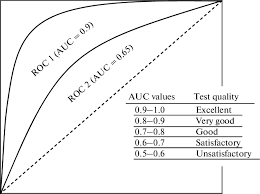

In [43]:
searchGridSubCol

subsample,colsample_bytree,max_depth,min_child,eta
1,1,8,1,0.2
1,1,10,1,0.2


In [44]:
ntrees <- 5 ## 학습을 몇 번 돌릴 것이냐. 5번을 돌릴 것인가?

searchGridSubCol는 dataframe이고
1이면 행에다가 뒤에 있는 함수를 적용하라는 뜻
```R
loglossErrorsHyperparameters <- apply(searchGridSubCol, 1, function(parameterList){
```
xgb.cv에 있는 metrics을 변경해주면 된다.

In [45]:
system.time(
  loglossErrorsHyperparameters <- apply(searchGridSubCol, 1, function(parameterList){
    
    #Extract Parameters to test
    currentSubsampleRate <- parameterList[["subsample"]]
    currentColsampleRate <- parameterList[["colsample_bytree"]]
    currentDepth <- parameterList[["max_depth"]]
    currentEta <- parameterList[["eta"]]
    currentMinChild <- parameterList[["min_child"]]
      
    xgboostModelCV <- xgb.cv(data =  X, nrounds = ntrees, nfold = 2, showsd = TRUE, 
                             metrics = "logloss", verbose = TRUE, "eval_metric" = "logloss",
                             "objective" = "reg:logistic", "max.depth" = currentDepth, "eta" = currentEta,                               
                             "subsample" = currentSubsampleRate, "colsample_bytree" = currentColsampleRate
                             , print_every_n = 10, "min_child_weight" = currentMinChild, booster = "gbtree",
                             early_stopping_rounds = 10)
                              ## nrounds = 학습 횟수, nfold = Train data를 몇 개로 쪼갤 것이냐, metrics = logloss... 측정 오차를 logloss로 본다는 뜻
                              ## GB를 한 번 돌리고, 오차를 줄이는 방향으로 한 번 더 돌리고, *5
                              ## 사용자가 적어야 할 부분은 metrics 와 objective
                              ## reg:logistic == binary:logistic
    
    xvalidationScores <- as.data.frame(xgboostModelCV$evaluation_log)
    logloss <- tail(xvalidationScores$test_logloss_mean, 1)
    tlogloss <- tail(xvalidationScores$train_logloss_mean,1)
    output <- return(c(logloss, tlogloss, currentSubsampleRate, currentColsampleRate, currentDepth, currentEta, currentMinChild))
    
  }))

[1]	train-logloss:0.564380+0.000003	test-logloss:0.564687+0.000047 
Multiple eval metrics are present. Will use test_logloss for early stopping.
Will train until test_logloss hasn't improved in 10 rounds.

[5]	train-logloss:0.341672+0.000033	test-logloss:0.343036+0.000104 
[1]	train-logloss:0.563658+0.000230	test-logloss:0.564542+0.000070 
Multiple eval metrics are present. Will use test_logloss for early stopping.
Will train until test_logloss hasn't improved in 10 rounds.

[5]	train-logloss:0.338476+0.000629	test-logloss:0.342683+0.000346 


   user  system elapsed 
 71.204   3.732  80.032 

In [46]:
output <- as.data.frame(t(loglossErrorsHyperparameters)) ## t는 transpose, 행렬을 서로 바꿈
head(output)
varnames <- c("Testlogloss", "Trainlogloss", "SubSampRate", "ColSampRate", "Depth", "eta", "currentMinChild")
names(output) <- varnames
head(output)

V1,V2,V3,V4,V5,V6,V7
0.3430360,0.3416715,1,1,8,0.2,1
0.3426835,0.3384765,1,1,10,0.2,1


Testlogloss,Trainlogloss,SubSampRate,ColSampRate,Depth,eta,currentMinChild
0.3430360,0.3416715,1,1,8,0.2,1
0.3426835,0.3384765,1,1,10,0.2,1


어떤 parameter가 제일 성능이 좋을지 판단하는 지표
- 낮을수록 좋은 건데 실제로 test data에 적용했을 때 안 맞을 수 있다는 것
- train 내에서 보기에는 score가 낮을수록 좋은 분류기다.

위에 나온 지표들을 토대로 아래 params를 수정

In [49]:
# model --------------------------------------------------------------------
params = list(
  "objective"           = "reg:logistic",
  "eval_metric"         = "logloss",
  "eta"                 = 0.01,
  "max_depth"           = 10,
  "min_child_weight"    = 10,
  "gamma"               = 0.70,
  "subsample"           = 1.0,
  "colsample_bytree"    = 1.0,
  "alpha"               = 2e-05,
  "lambda"              = 10
)

In [50]:
subtrain = train %>% sample_frac(0.2) ## 20%만

In [51]:
X = xgb.DMatrix(as.matrix(subtrain %>% select(-reordered)), label = subtrain$reordered) ## xgboost 패키지에서 알고리즘을 돌리려면 xgb.dmatrix를 x로 바꿔주어야 한다.

In [53]:
# xgboost로 모델링을 하는데 30번 한다.
model = xgboost(data = X, params = params, nrounds = 30)

[1]	train-logloss:0.686027 
[2]	train-logloss:0.679048 
[3]	train-logloss:0.672206 
[4]	train-logloss:0.665496 
[5]	train-logloss:0.658917 
[6]	train-logloss:0.652462 
[7]	train-logloss:0.646131 
[8]	train-logloss:0.639919 
[9]	train-logloss:0.633822 
[10]	train-logloss:0.627839 
[11]	train-logloss:0.621967 
[12]	train-logloss:0.616201 
[13]	train-logloss:0.610542 
[14]	train-logloss:0.604985 
[15]	train-logloss:0.599527 
[16]	train-logloss:0.594167 
[17]	train-logloss:0.588904 
[18]	train-logloss:0.583729 
[19]	train-logloss:0.578649 
[20]	train-logloss:0.573656 
[21]	train-logloss:0.568752 
[22]	train-logloss:0.563930 
[23]	train-logloss:0.559190 
[24]	train-logloss:0.554533 
[25]	train-logloss:0.549954 
[26]	train-logloss:0.545455 
[27]	train-logloss:0.541029 
[28]	train-logloss:0.536680 
[29]	train-logloss:0.532403 
[30]	train-logloss:0.528195 


In [54]:
# 변수들의 중요성을 보기 위해
importance = xgb.importance(colnames(X), model = model)

## 재구매에 영향을 미치는 중요 지표 시각화
- up_order_rate : 전체 주문 건수 중에서 그 상품의 주문 건수 비중
> - 해당상품을 많이 사면 재구매를 많이 한다
> - 파생변수를 생성할 수도 있다.
>> - 예를 들면, departments, aisle 카테고리 전체 판ao 건수 중에서 해당 상품의 거래 건수
- 

- feature가 많은 것 같으면... 위로 다시 올라가서 제거

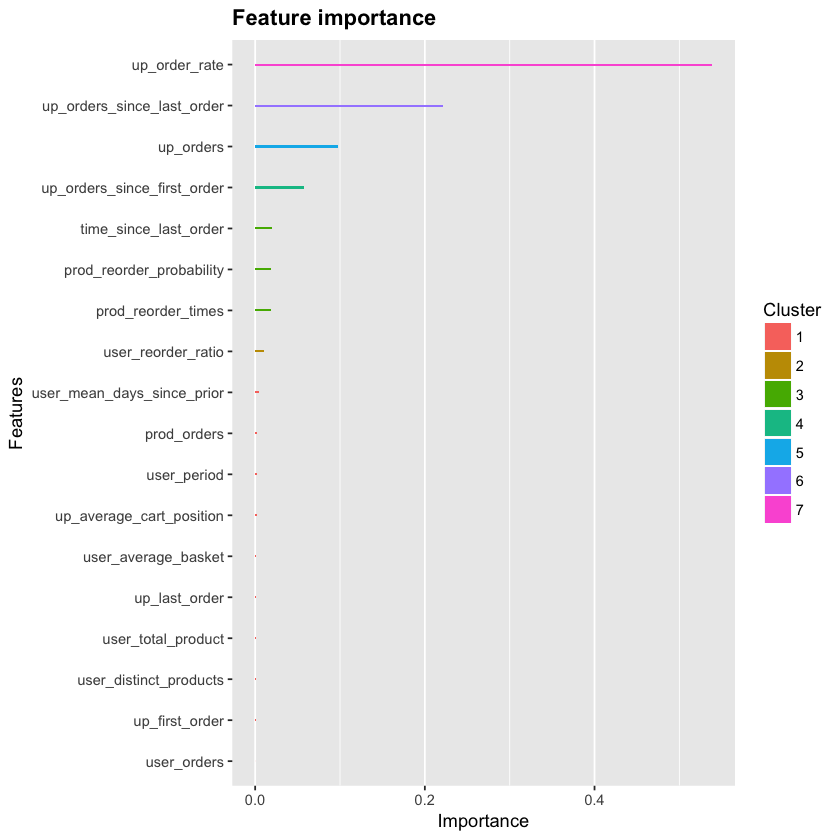

In [56]:
xgb.ggplot.importance(importance)

In [57]:
rm(X, importance, subtrain)
gc()

,used,(Mb),gc trigger,(Mb),limit (Mb),max used,(Mb)
Ncells,1966326,105.1,7967056,425.5,NA,30391914,1623.2
Vcells,253892633,1937.1,589292569,4496.0,16384,726677397,5544.2


In [58]:
# Apply model -------------------------------------------------------------
X = xgb.DMatrix(as.matrix(test %>% select(-order_id, -product_id)))
test$reordered = predict(model, X) ## test table의 reordered에 predict한 확률이 들어감

In [60]:
head(test)

product_id,up_orders,up_first_order,up_last_order,up_average_cart_position,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_orders,⋯,user_total_product,user_reorder_ratio,user_distinct_products,user_average_basket,order_id,time_since_last_order,up_order_rate,up_orders_since_last_order,up_orders_since_first_order,reordered
248,1,2,2,3.000000,6371,0.2795080,1.667365,0.4002511,12,⋯,88,0.7051282,33,7.333333,2774568,11,0.08333333,10,0.09090909,0.3750122
1005,1,10,10,5.000000,463,0.3127413,1.787645,0.4406048,12,⋯,88,0.7051282,33,7.333333,2774568,11,0.08333333,2,0.33333333,0.3839403
1819,3,4,7,2.666667,2424,0.3468725,1.969131,0.4921617,12,⋯,88,0.7051282,33,7.333333,2774568,11,0.25000000,5,0.33333333,0.3923607
7503,1,3,3,6.000000,12474,0.3837314,2.239899,0.5535514,12,⋯,88,0.7051282,33,7.333333,2774568,11,0.08333333,9,0.10000000,0.3763811
8021,1,2,2,5.000000,27864,0.4408357,2.445927,0.5911570,12,⋯,88,0.7051282,33,7.333333,2774568,11,0.08333333,10,0.09090909,0.3780925
9387,5,1,7,3.600000,36187,0.4691700,2.860632,0.6504269,12,⋯,88,0.7051282,33,7.333333,2774568,11,0.41666667,5,0.41666667,0.4118592


In [61]:
# test$reordered = (test$reordered > 0.5) * 1 ## 50% 이상이면 재구매한다고 보고, 50% 이상이면 1이 되고, 이하면 0이 된다.

In [70]:
test$reordered = (test$reordered > 0.21) * 1 ## 50% 이상이면 재구매한다고 보고, 50% 이상이면 1이 되고, 이하면 0이 된다.

- 실제로 하려면 train, test로 나눠야 한다.
- test 데이터에 대한 재구매 여부가 없다.
- test data에는 실제로 이 사람이 구매했는지 안 했는지에 대한 여부가 없다.
- 우리가 예측한 게 맞는지 안 맞는지 확인할 길이 없다.
- 이럴 때 train 데이터를 train/test로 쪼개서 예측을 한다.
- 그게 맞는지 안 맞는지 예측을 한다.

In [62]:
head(test) # 그런식으로 하면 구매를 할 지 안 할지 1, 0 으로 나눠질 것이다.

product_id,up_orders,up_first_order,up_last_order,up_average_cart_position,prod_orders,prod_reorder_probability,prod_reorder_times,prod_reorder_ratio,user_orders,⋯,user_total_product,user_reorder_ratio,user_distinct_products,user_average_basket,order_id,time_since_last_order,up_order_rate,up_orders_since_last_order,up_orders_since_first_order,reordered
248,1,2,2,3.000000,6371,0.2795080,1.667365,0.4002511,12,⋯,88,0.7051282,33,7.333333,2774568,11,0.08333333,10,0.09090909,0
1005,1,10,10,5.000000,463,0.3127413,1.787645,0.4406048,12,⋯,88,0.7051282,33,7.333333,2774568,11,0.08333333,2,0.33333333,0
1819,3,4,7,2.666667,2424,0.3468725,1.969131,0.4921617,12,⋯,88,0.7051282,33,7.333333,2774568,11,0.25000000,5,0.33333333,0
7503,1,3,3,6.000000,12474,0.3837314,2.239899,0.5535514,12,⋯,88,0.7051282,33,7.333333,2774568,11,0.08333333,9,0.10000000,0
8021,1,2,2,5.000000,27864,0.4408357,2.445927,0.5911570,12,⋯,88,0.7051282,33,7.333333,2774568,11,0.08333333,10,0.09090909,0
9387,5,1,7,3.600000,36187,0.4691700,2.860632,0.6504269,12,⋯,88,0.7051282,33,7.333333,2774568,11,0.41666667,5,0.41666667,0


In [63]:
# order_id 별로 재구매할(1) 상품들을 보여주는 것
# kaggle에 제출할 때 그런 식으로 제출하라고 요구한 것
# 옆에는 실제로 user_id도 있을 것.

submission = test %>%
  filter(reordered == 1) %>%
  group_by(order_id) %>%
  summarise(
    products = paste(product_id, collapse = " ") ## paste는 문자와 문자를 붙이라는 뜻
  )

In [64]:
head(submission)

order_id,products
137,24852
182,5479 9337 39275
257,24852 27966 29837 49235
313,12779 13198 21903 45007 46906
386,4920 15872 21479 22124 24852 30450 38281 39180 40759 42265 45066 47766
414,20564


없는 값

In [65]:
missing = data.frame(
  order_id = unique(test$order_id[!test$order_id %in% submission$order_id]),   # %in% test$order_id에 submission$order_id가 있느냐를 True&False로 반환해서 !는 반대니깐 ... 실제적으로 없는 게 나온다. ## test orderid중에서 submission에 없는 것 중의 unique를 뽑는 것
  products = "None"
)

있는 값 + 없는 값

In [66]:
submission = submission %>% bind_rows(missing) %>% arrange(order_id)

Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

In [67]:
submission %>% head()

order_id,products
17,None
34,None
137,24852
182,5479 9337 39275
257,24852 27966 29837 49235
313,12779 13198 21903 45007 46906


In [71]:
# write.csv(submission, file = paste0(path,"/submit3.csv"), row.names = F)

ERROR: Error in paste0(path, "./submit3.csv"): 객체 'path'를 찾을 수 없습니다


In [72]:
write.csv(submission, file = ("./submit3.csv"), row.names = F)